BOM MOVIE ANALYSIS

Overview


This project analyzes what types of films are currently doing the best in bom movies site and the top ten studio that has been performing best. The insights from this analysis is to enable the head of the company's new movie studio to decide what type of films to create


Business Problem

The company has decided to create a new movie studio, but they don’t know anything about creating movies. The goal of the analysis is to help them decide what type of movies to create.

In [172]:
# Importing relevant libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
#Loading the data into a dataframe called bom_movies

bom_movies= pd.read_csv('bom.movie_gross.csv.gz')
bom_movies.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Inspecting the data

In [174]:
bom_movies.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [175]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [176]:
bom_movies.shape

(3387, 5)

In [177]:
bom_movies.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Understanding each column

In [178]:
bom_movies['title'].value_counts()

title
Bluebeard               2
Before We Go            1
Knock Knock             1
Kindergarten Teacher    1
Welcome to Leith        1
                       ..
Monsters University     1
Gravity                 1
Man of Steel            1
Thor: The Dark World    1
An Actor Prepares       1
Name: count, Length: 3386, dtype: int64

In [179]:
bom_movies['studio'].value_counts()

studio
IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: count, Length: 257, dtype: int64

In [180]:
bom_movies['year'].value_counts()

year
2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: count, dtype: int64

Data Preparation

Data Cleaning

In [181]:
#Count number of missing value
bom_movies.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [182]:
#Dropping the missing values and confirming that the dataframe has no missing values
bom_movies = bom_movies.dropna()
bom_movies.isnull().sum()


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [183]:
bom_movies.shape

(2007, 5)

In [184]:
#Check for duplicated values
bom_movies.duplicated().sum()

0

In [185]:
#Summary statistics for domestic gross
domestic_summary = bom_movies['domestic_gross'].describe()
summary = domestic_summary.apply(lambda x: f"{x:,.2f}")

print("Domestic Gross Summary:")
print(summary)

Domestic Gross Summary:
count          2,007.00
mean      47,019,840.20
std       81,626,889.32
min              400.00
25%          670,000.00
50%       16,700,000.00
75%       56,050,000.00
max      936,700,000.00
Name: domestic_gross, dtype: object


The average domestic gross is approximately $45 million

In [186]:
# Calculating the minimum and maximum domestic gross values
min_domestic_gross = bom_movies['domestic_gross'].min()
max_domestic_gross = bom_movies['domestic_gross'].max()

print(f"Min Domestic Gross: {min_domestic_gross}")
print(f"Max Domestic Gross: {max_domestic_gross}")

Min Domestic Gross: 400.0
Max Domestic Gross: 936700000.0



The domestic gross values span from $400 to $936.7 million.

In [187]:
# Get an overview of the eranings
print(bom_movies[['domestic_gross', 'foreign_gross']].describe())


       domestic_gross
count    2.007000e+03
mean     4.701984e+07
std      8.162689e+07
min      4.000000e+02
25%      6.700000e+05
50%      1.670000e+07
75%      5.605000e+07
max      9.367000e+08


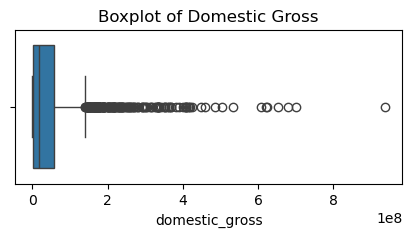

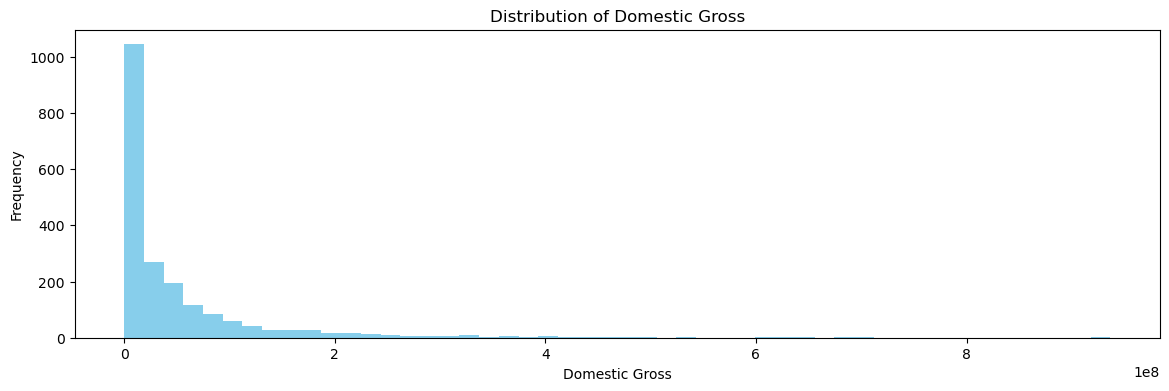

In [188]:
#Checking for outliers by visualization

plt.figure(figsize=(5,2))
sns.boxplot(x=bom_movies['domestic_gross'])
plt.title('Boxplot of Domestic Gross')
plt.show()

plt.figure(figsize=(14, 4))
bom_movies['domestic_gross'].plot(kind='hist', bins=50, color='skyblue')
plt.title('Distribution of Domestic Gross')
plt.xlabel('Domestic Gross')
plt.show()

In [189]:
#Domestic gross comparison across studios using the mean and the sum

studio = bom_movies.groupby('studio')['domestic_gross'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False)

studio = studio.map(lambda x: f"{x:,.2f}")

print("Domestic Gross Comparison Across Studios:")
print(studio)


Domestic Gross Comparison Across Studios:
                      mean                sum
studio                                       
BV          176,889,703.84  18,396,529,199.00
Uni.         89,528,041.67  12,892,038,000.00
WB           93,258,461.54  12,123,600,000.00
Fox          81,526,119.38  10,924,499,997.00
Sony         80,566,467.60   8,459,479,098.00
...                    ...                ...
Grindstone       10,000.00          10,000.00
Libre             7,200.00           7,200.00
ParC              5,900.00           5,900.00
Shout!            2,800.00           5,600.00
DR                  800.00             800.00

[172 rows x 2 columns]


In [190]:
#Getting the top 10 studios per apperance

top_studios_per_apperance = bom_movies['studio'].value_counts().head(10)
top_studios_per_apperance


studio
Uni.     144
Fox      134
WB       130
Sony     105
BV       104
Par.      94
LGF       87
Wein.     69
IFC       68
SPC       59
Name: count, dtype: int64

In [191]:
#Converting foreign_gross to numeric values, forcing errors to Nan
bom_movies['foreign_gross'] = pd.to_numeric(bom_movies['foreign_gross'], errors='coerce')

In [192]:
#Adding a new column of total_gross
bom_movies['total_gross'] = bom_movies['domestic_gross'] + bom_movies['foreign_gross']
bom_movies.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
7,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,5.431000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08


In [193]:
#Setting the index to be studio
bom_movies = bom_movies.set_index('studio')
bom_movies.head()

,title,domestic_gross,foreign_gross,year,total_gross
studio,,,,,
BV,Toy Story 3,415000000.0,652000000.0,2010,1.067000e+09
BV,Alice in Wonderland (2010),334200000.0,691300000.0,2010,1.025500e+09
WB,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,9.603000e+08
WB,Inception,292600000.0,535700000.0,2010,8.283000e+08
P/DW,Shrek Forever After,238700000.0,513900000.0,2010,7.526000e+08


In [194]:
#Top ten movies watched by the domestic market 
bom_movies_domestic_more_than_foreign = bom_movies[bom_movies['domestic_gross'] > bom_movies['foreign_gross']]
print(bom_movies_domestic_more_than_foreign.head(10))

                   title  domestic_gross  foreign_gross  year  total_gross
studio                                                                    
Par.          Iron Man 2     312400000.0    311500000.0  2010  623900000.0
Sony           Grown Ups     162000000.0    109400000.0  2010  271400000.0
Par.           True Grit     171200000.0     81000000.0  2010  252200000.0
WB (NL)  Valentine's Day     110500000.0    106000000.0  2010  216500000.0
Par.         Jackass 3-D     117200000.0     54500000.0  2010  171700000.0
Sony      The Other Guys     119200000.0     51200000.0  2010  170400000.0
WB       The Book of Eli      94800000.0     62300000.0  2010  157100000.0
WB              The Town      92200000.0     61800000.0  2010  154000000.0
Fox           Date Night      98700000.0     53600000.0  2010  152300000.0
Par.         The Fighter      93600000.0     35600000.0  2010  129200000.0


In [195]:
#Top ten movies watched by the foreign market 
bom_movies_foreign_more_than_domestic = bom_movies[bom_movies['foreign_gross'] > bom_movies['domestic_gross']]
print(bom_movies_foreign_more_than_domestic.head(10))


                                              title  domestic_gross  \
studio                                                                
BV                                      Toy Story 3     415000000.0   
BV                       Alice in Wonderland (2010)     334200000.0   
WB      Harry Potter and the Deathly Hallows Part 1     296000000.0   
WB                                        Inception     292600000.0   
P/DW                            Shrek Forever After     238700000.0   
Sum.                     The Twilight Saga: Eclipse     300500000.0   
BV                                          Tangled     200800000.0   
Uni.                                  Despicable Me     251500000.0   
P/DW                       How to Train Your Dragon     217600000.0   
WB                       Clash of the Titans (2010)     163200000.0   

        foreign_gross  year   total_gross  
studio                                     
BV        652000000.0  2010  1.067000e+09  
BV        69130

In [196]:
#Top studio according to the revenue generated
studio_performance = bom_movies.groupby('studio')[['domestic_gross', 'foreign_gross', 'total_gross']].sum()
top_studios = studio_performance.sort_values(by='total_gross',ascending=False).head(10)
top_studios[0:10]

,domestic_gross,foreign_gross,total_gross
studio,,,
BV,1.839653e+10,2.579385e+10,4.257488e+10
Fox,1.092450e+10,2.005587e+10,3.098037e+10
WB,1.212360e+10,1.866790e+10,3.079150e+10
Uni.,1.289204e+10,1.685477e+10,2.851551e+10
Sony,8.459479e+09,1.394524e+10,2.240472e+10
Par.,7.580813e+09,1.186338e+10,1.944420e+10
WB (NL),3.975100e+09,6.339000e+09,1.031410e+10
LGF,3.991851e+09,4.475619e+09,8.467471e+09
LG/S,1.965200e+09,3.353724e+09,5.318924e+09


Analysis

In [197]:
bom_movies.head(10)

,title,domestic_gross,foreign_gross,year,total_gross
studio,,,,,
BV,Toy Story 3,415000000.0,652000000.0,2010,1.067000e+09
BV,Alice in Wonderland (2010),334200000.0,691300000.0,2010,1.025500e+09
WB,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,9.603000e+08
WB,Inception,292600000.0,535700000.0,2010,8.283000e+08
P/DW,Shrek Forever After,238700000.0,513900000.0,2010,7.526000e+08
Sum.,The Twilight Saga: Eclipse,300500000.0,398000000.0,2010,6.985000e+08
Par.,Iron Man 2,312400000.0,311500000.0,2010,6.239000e+08
BV,Tangled,200800000.0,391000000.0,2010,5.918000e+08
Uni.,Despicable Me,251500000.0,291600000.0,2010,5.431000e+08


1. Yearly Trends - trends in gross earning and the movie count over the years

In [198]:
#Looking at the yearly trends since 2010 - 2018

yearly_trends = bom_movies.groupby('year').agg({
    'domestic_gross': 'sum',  
    'foreign_gross': 'sum',  
    'title': 'count'         
}).rename(columns={'title': 'movie_count'}).reset_index()
yearly_trends

,year,domestic_gross,foreign_gross,movie_count
0,2010,1.015274e+10,1.436937e+10,308
1,2011,9.915690e+09,1.566287e+10,290
2,2012,1.069786e+10,1.700298e+10,243
3,2013,1.055885e+10,1.658024e+10,200
4,2014,1.014798e+10,1.695667e+10,234
5,2015,1.074487e+10,1.515435e+10,190
6,2016,1.086969e+10,1.898139e+10,192
7,2017,1.051677e+10,1.992893e+10,177
8,2018,1.076436e+10,1.747449e+10,173


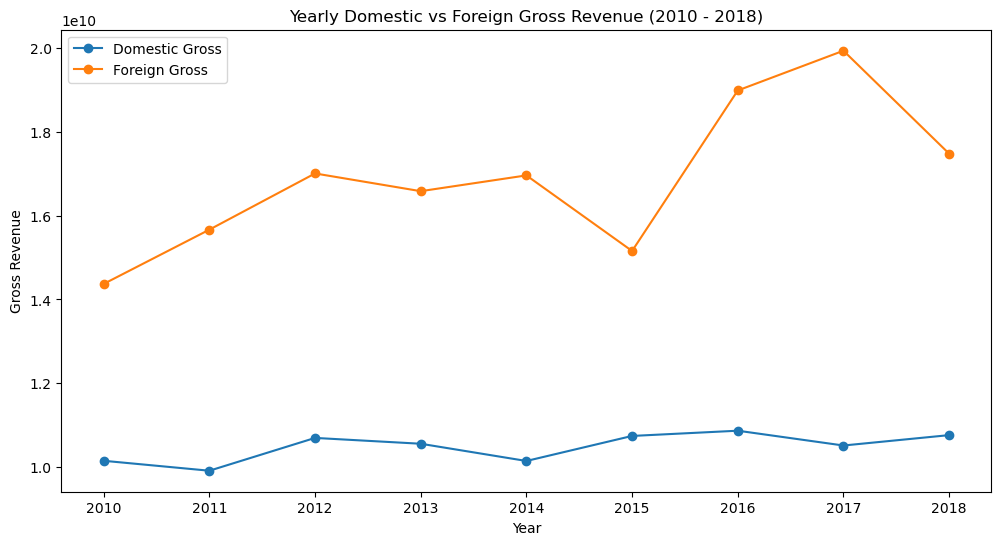

In [199]:
#Comparing the domestic gross with the foreign gross
# Plot
yearly_trends_filtered = yearly_trends[(yearly_trends['year'] >= 2010) & (yearly_trends['year'] <= 2018)]

plt.figure(figsize=(12, 6))
plt.plot(yearly_trends_filtered['year'], yearly_trends_filtered['domestic_gross'], label='Domestic Gross', marker='o')
plt.plot(yearly_trends_filtered['year'], yearly_trends_filtered['foreign_gross'], label='Foreign Gross', marker='o')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.title('Yearly Domestic vs Foreign Gross Revenue (2010 - 2018)')
plt.legend()
plt.show()


         domestic_gross  foreign_gross   total_gross
studio                                              
BV         1.839653e+10   2.579385e+10  4.419038e+10
Fox        1.092450e+10   2.005587e+10  3.098037e+10
WB         1.212360e+10   1.866790e+10  3.079150e+10
Uni.       1.289204e+10   1.685477e+10  2.974681e+10
Sony       8.459479e+09   1.394524e+10  2.240472e+10
Par.       7.580813e+09   1.186338e+10  1.944420e+10
WB (NL)    3.975100e+09   6.339000e+09  1.031410e+10
LGF        3.991851e+09   4.475619e+09  8.467471e+09
LG/S       1.965200e+09   3.353724e+09  5.318924e+09
P/DW       1.682900e+09   3.393600e+09  5.076500e+09


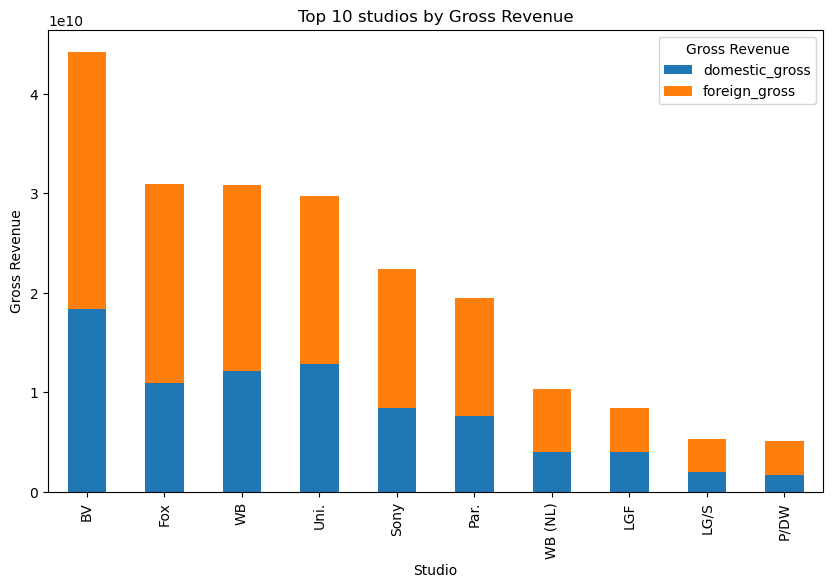

In [200]:
#Top studio acccording to the revenue generated
studio_performance = bom_movies.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

#Top 10 studios by total gross revenue
studio_performance['total_gross'] = studio_performance['domestic_gross'] + studio_performance['foreign_gross']
top_studios = studio_performance.sort_values(by='total_gross', ascending=False).head(10)
print(top_studios)

#Plotting a stacked bar chart
top_studios[['domestic_gross', 'foreign_gross']].plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Top 10 studios by Gross Revenue')
plt.xlabel('Studio')
plt.ylabel('Gross Revenue')
plt.legend(title='Gross Revenue')
plt.show()

Based on the analysis done, foreign gross significantly drives revenue for studios. The head of the company's new movies studio should ensure the studio invests in globally appealing content so as earn more reveunue.
The  studio can also consider collaborations with successful studios or talent.

More data can help in making more informed decisions with regards to:
Genre consumed by the domestic and international market
Cost of production

Time series analysis of how domestic gross, foreign gross and the total gross have changed overtime by year of production.

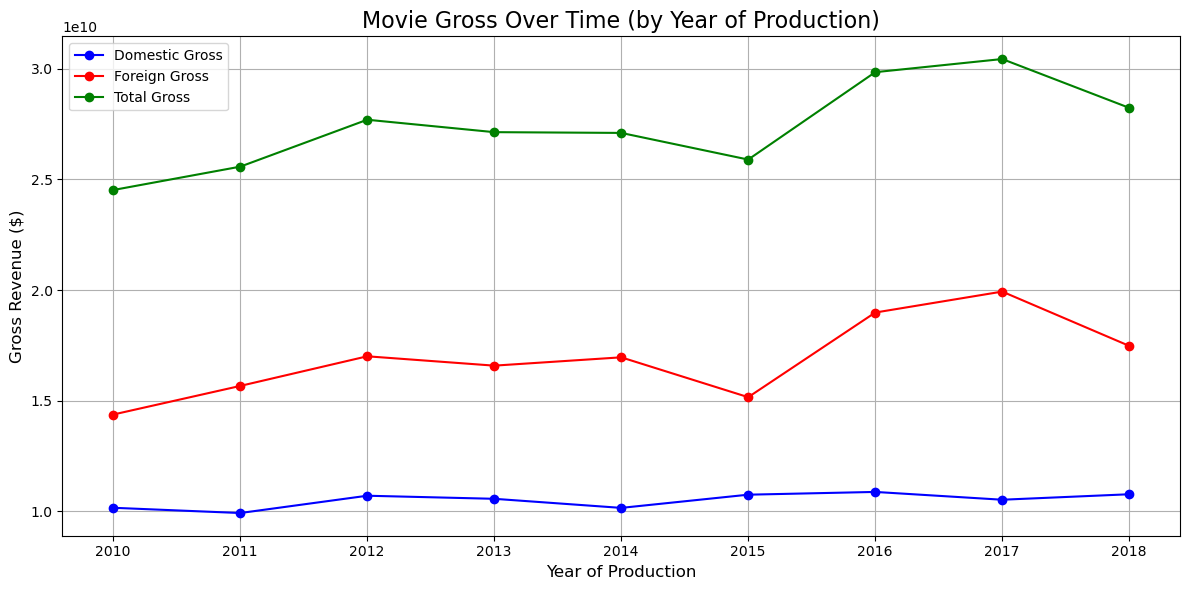

In [201]:
# Year_of_production and sum the domestic and foreign grosses
yearly_gross = bom_movies.groupby('year')[['domestic_gross', 'foreign_gross']].sum()


yearly_gross['total_gross'] = yearly_gross['domestic_gross'] + yearly_gross['foreign_gross']


# Plotting the time series for domestic, foreign, and total gross
plt.figure(figsize=(12, 6))

plt.plot(yearly_gross.index, yearly_gross['domestic_gross'], label='Domestic Gross', color='blue', marker='o')
plt.plot(yearly_gross.index, yearly_gross['foreign_gross'], label='Foreign Gross', color='red', marker='o')
plt.plot(yearly_gross.index, yearly_gross['total_gross'], label='Total Gross', color='green', marker='o')

plt.title('Movie Gross Over Time (by Year of Production)', fontsize=16)
plt.xlabel('Year of Production', fontsize=12)
plt.ylabel('Gross Revenue ($)', fontsize=12)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()



The trends in foreign gross and the total gross in general are steadily increasing, and the dominant source of revenue is the international market.

In [202]:
bom_movies.head(10)

,title,domestic_gross,foreign_gross,year,total_gross
studio,,,,,
BV,Toy Story 3,415000000.0,652000000.0,2010,1.067000e+09
BV,Alice in Wonderland (2010),334200000.0,691300000.0,2010,1.025500e+09
WB,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,9.603000e+08
WB,Inception,292600000.0,535700000.0,2010,8.283000e+08
P/DW,Shrek Forever After,238700000.0,513900000.0,2010,7.526000e+08
Sum.,The Twilight Saga: Eclipse,300500000.0,398000000.0,2010,6.985000e+08
Par.,Iron Man 2,312400000.0,311500000.0,2010,6.239000e+08
BV,Tangled,200800000.0,391000000.0,2010,5.918000e+08
Uni.,Despicable Me,251500000.0,291600000.0,2010,5.431000e+08


Covariance

In [203]:
data = {'domestic_gross': [415000000.0,334200000.0 , 296000000.0,292600000.0 ,238700000.0 ], 'foreign_gross': [652000000.0, 691300000.0,	664300000.0 , 535700000.0, 513900000.0 ]}
cov_data = pd.DataFrame(data)

# Calculate covariance between X and Y
cov_matrix = cov_data.cov()
cov_XY = cov_matrix.loc['domestic_gross', 'foreign_gross']

print("Cov between domestic and foreign:", cov_XY)


Cov between domestic and foreign: 3430962500000000.0


This is a positive covariance between domestic and foreign gross which means when the domestic gross of a movie increases, the foreign gross tends to increase as well, and vice versa.
This could suggest that movies with high domestic gross tend to also perform well internationally.

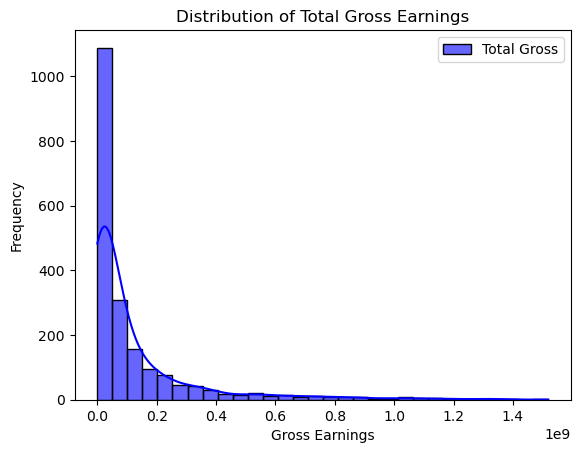

In [204]:
#Distribution of the total gross
sns.histplot(bom_movies['total_gross'], kde=True, color='blue', label='Total Gross', bins=30, alpha=0.6)

# Add labels, title, and legend
plt.legend()
plt.title('Distribution of Total Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Frequency')

# Display the plot
plt.show()


The earnings distributions for both domestic and foreign markets are heavily right-skewed.
This means the majority of movies have lower gross earnings, while a small number of movies achieve very high earnings.

The mode of the distribution is in the 0-50 million range, indicating that most movies fall into this earnings bracket.

Correlation

In [205]:
# Calculating the correlation
numerical_columns = ['domestic_gross', 'foreign_gross']

# Calculating the correlation matrix
correlation_matrix = bom_movies[numerical_columns].corr()
print(correlation_matrix)


                domestic_gross  foreign_gross
domestic_gross        1.000000       0.831178
foreign_gross         0.831178       1.000000


The correlation between domestic_gross and foreign gross is 0.831178. This value is positive, meaning that as the domestic gross increases, the foreign gross also tends to increase, and vice versa.
The value of 0.831178 indicates a strong positive correlation. This would suggest that the domestic gross and foreign gross are strongly related to each other, and movies that perform well domestically also tend to perform well in foreign markets.

If we know the domestic gross of a movie, we can reasonably predict its foreign gross to some extent, given the strong correlation. However, the correlation is not perfect, so there are other factors that might influence the foreign gross such as the genre of the movie, country of production and even marketing efforts.


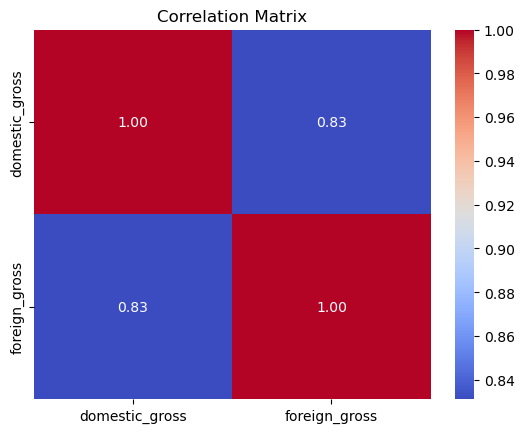

In [206]:
#Correlation plot

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Hypothesis testing

Hypothesis Test : Test if there is a significant difference in earnings based on the year

Null Hypothesis (H₀): Domestic gross earnings do not vary significantly by year.

Alternative Hypothesis (H₁): Domestic gross earnings vary significantly by year.



In [207]:

#Performing the ANOVA test
earnings_by_year = [
    bom_movies[bom_movies['year'] == year]['domestic_gross'].dropna()
    for year in bom_movies['year'].unique()
]

# Perform ANOVA test
anova_result = f_oneway(*earnings_by_year)

# Display the result
print("ANOVA Result:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")


ANOVA Result:
F-statistic: 4.231059277079157
P-value: 4.769221523953286e-05


The p-value (0.0000477) is much smaller than the common significance level.
This means we reject the null hypothesis and conclude that there is a statistically significant difference in domestic gross earnings across the years.
Suggesting that domestic gross earnings have changed over the years.

In conclusion, foreign earnings tend to be higher than domestic earnings for most movies. The new studio should focus on producing globally appealing films with high foreign revenue potential.

The head of the company's new movie studio should also consider collaborations with successful studios especially the top ten in terms of the revenue generated and appearnce(the number of movies they've produced). A studio like, BV (likely Walt Disney) that stands out as the top performer both in terms of average and total domestic gross earnings. This suggests that Disney movies are consistently popular and highly profitable. They are likely a key player in the industry and could be considered a model for success.